# Generating data for the experiment

Each dataset consists of n instances of each data generating process. Little overlap.

## Structure of dataset I
- Two data generating processes, each generating one normally distributed value.

## Structure of dataset II
- Three data generating processes, each generating two normally distributed values and a poisson value. There is significant overlap between the values produced by the processes.

### Housekeeping

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Construct a random number generator
rng = np.random.default_rng(seed=12843)

#Define number of samples from each data generating process
n = 1000

### Dataset I

In [76]:
#Set the parameters for the processes
mu_a, sigma_a = 0, 0.5
mu_b, sigma_b = 3, 1

#Draw
a = rng.normal(mu_a, sigma_a, n)
b = rng.normal(mu_b, sigma_b, n)

Let's have a look at the data.

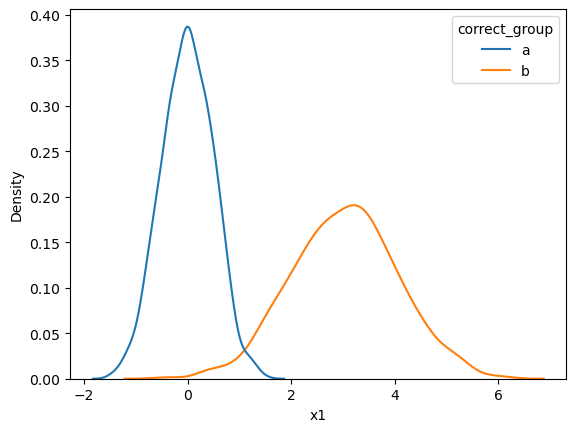

In [148]:
sns.kdeplot(data=dataset_1, x="x1", hue="correct_group");

In [78]:
dataset_1 = pd.DataFrame({"a": a, "b": b})
dataset_1 = dataset_1.melt(value_vars=["a", "b"], id_vars=[], var_name="correct_group", value_name="x1")
#Shuffle rows
dataset_1 = dataset_1.sample(frac=1).reset_index(drop=True)

In [79]:
dataset_1.head()

,correct_group,x1
0,a,0.002812
1,b,2.353635
2,b,1.588879
3,b,0.963612
4,a,-0.052165


In [80]:
#Save the dataset to csv
dataset_1.to_csv("dataset_1.csv")

### Dataset 2

In [133]:
#Set params
mu_c, sigma_c = (0, 3), (0.5, 1)
mu_d, sigma_d = (0.5, 2.5), (0.2, 1)
mu_e, sigma_e = (-1, 0.5), (1, 0.3)

lam_c, lam_d, lam_e = 0.3, 2, 3

In [134]:
#Draw
c_x1 = rng.normal(loc=mu_c[0], scale=sigma_c[0], size=n)
c_x2 = rng.normal(loc=mu_c[1], scale=sigma_c[1], size=n)
c_x3 = rng.poisson(lam=lam_c, size=n)
c = pd.DataFrame({"x1": c_x1, "x2": c_x2, "x3": c_x3, "correct_group": "c"})

d_x1 = rng.normal(loc=mu_d[0], scale=sigma_d[0], size=n)
d_x2 = rng.normal(loc=mu_d[1], scale=sigma_d[1], size=n)
d_x3 = rng.poisson(lam=lam_d, size=n)
d = pd.DataFrame({"x1": d_x1, "x2": d_x2, "x3": d_x3, "correct_group": "d"})

e_x1 = rng.normal(loc=mu_e[0], scale=sigma_e[0], size=n)
e_x2 = rng.normal(loc=mu_e[1], scale=sigma_e[1], size=n)
e_x3 = rng.poisson(lam=lam_e, size=n)
e = pd.DataFrame({"x1": e_x1, "x2": e_x2, "x3": e_x3, "correct_group": "e"})

In [135]:
#Concat to one dataset and shuffle
dataset_2 = pd.concat([c,d,e]).sample(frac=1).reset_index(drop=True)

In [176]:
dataset_2.head()

,x1,x2,x3,correct_group
0,-0.089321,3.879874,0,c
1,-0.951377,-0.003326,2,e
2,0.614612,3.864163,1,c
3,-1.290581,0.484036,1,e
4,-1.686162,0.560771,2,e


<AxesSubplot: xlabel='x1', ylabel='x2'>

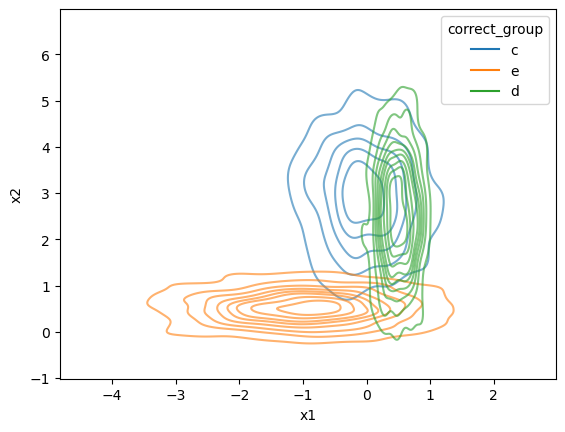

In [152]:
#Let's take a look at the data, first the continious variables. As can be seen, quite some overlap. Especially between c and d.
sns.kdeplot(data=dataset_2, x="x1", y="x2", hue="correct_group", alpha=0.6)

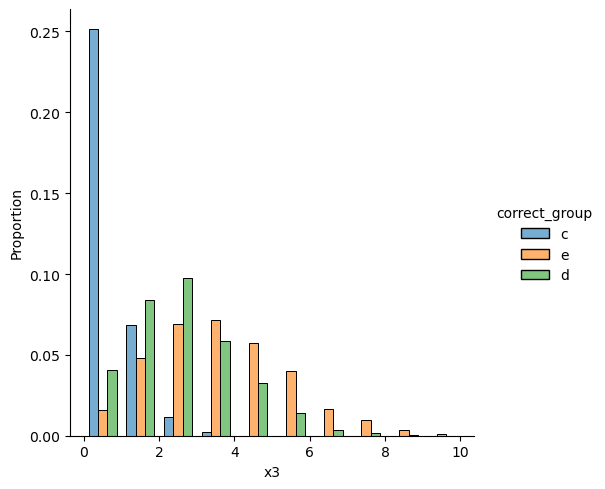

In [175]:
#However, c and d could be differentiated by looking at x3
sns.displot(data=dataset_2, x="x3", hue="correct_group", alpha=0.6, multiple="dodge", binwidth=1, stat="proportion", shrink=0.75)

In [177]:
#Save the dataset to csv
dataset_2.to_csv("dataset_2.csv")